In [2]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import random

## Lesson 25: Central Limit Theorem

We have been conducting hypothesis tests and building confidence intervals for several lessons now. However, we have relied on simulation up until now. Using simulation is beneficial because it does not require any distributional assumptions in your population. It also can be simpler, since the tools are readily available and fairly easy to use. Further, using simulation allows us to build confidence intervals and conduct hypothesis tests on a wider array of parameters. 

However, this has not always been the case. Before simulation was easy and readily available, we had to use other methods to obtain the distribution of our test statistic under $H_0$. This required a lot of asymptotic theory and heavy reliance on the Central Limit Theorem.

There are many ways to state the Central Limit Theorem. One form of the Central Limit Theorem states that regardless of the distribution of a population, the mean of a sample will approximately follow the normal distribution (for sufficient sample size). 

#### Demonstration

Suppose we flip a fair coin. The result of the coin flip is either heads (1) or tails (0). Since this is a fair coin, the probability of each result is 0.5. 

Now, let's flip the coin 10 times and collect the proportion of heads. Repeat this process 10000 times to see the distribution of the sample proportion.  

0.50165
0.024792277499999998


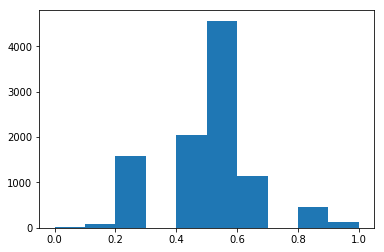

In [3]:
samp_props=[np.mean(random.choices([0,1],k=10)) for _ in np.arange(10000)]
print(np.mean(samp_props))
print(np.var(samp_props))
plt.hist(samp_props)
plt.show()

Now let's consider 100 flips instead of 10:

0.499626
0.0025147801240000007


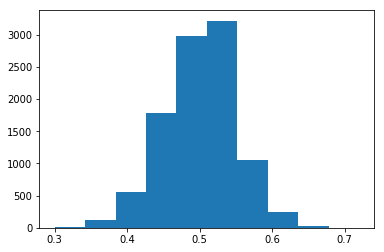

In [4]:
samp_props=[np.mean(random.choices([0,1],k=100)) for _ in np.arange(10000)]
print(np.mean(samp_props))
print(np.var(samp_props))
plt.hist(samp_props)
plt.show()

And now 1000 flips: 

0.4999798
0.0002545259919600003


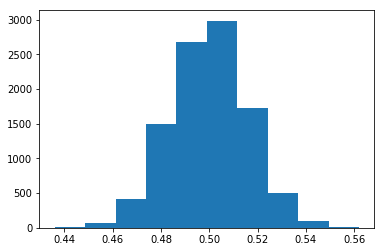

In [5]:
samp_props=[np.mean(random.choices([0,1],k=1000)) for _ in np.arange(10000)]
print(np.mean(samp_props))
print(np.var(samp_props))
plt.hist(samp_props)
plt.show()

What did you notice about the behavior of the sample proportion as the size of the sample increased? 

First, the distribution of the sample proportion appeared more normal. Second, the variance of the sample mean decreased as the size of the sample increased. 

This result can be used in inferential statistics.

#### Example

For example, let's consider our `iris` dataset. Suppose we are interested in building a confidence interval for mean petal width of the setosa species. 

Let's build the confidence interval using simulation. 

In [6]:
iris=Table().read_table('iris.csv')

In [7]:
# get the relevent information
iris_sub=iris.select(4,3).where('species','setosa')
iris_sub

species,petal_width
setosa,0.2
setosa,0.2
setosa,0.2
setosa,0.2
setosa,0.2
setosa,0.4
setosa,0.3
setosa,0.2
setosa,0.2
setosa,0.1


In [8]:
#sample once, for demonstration
num_obs=iris_sub.num_rows
iris_sub.with_column("sampled",iris_sub.sample(num_obs,with_replacement=True).column(1))

species,petal_width,sampled
setosa,0.2,0.2
setosa,0.2,0.4
setosa,0.2,0.1
setosa,0.2,0.4
setosa,0.2,0.2
setosa,0.4,0.2
setosa,0.3,0.2
setosa,0.2,0.2
setosa,0.2,0.2
setosa,0.1,0.3


In [9]:
#Sample 10000 times to get an empirical distribution of the sample mean
num_obs=iris_sub.num_rows
samp_means=[np.mean(iris_sub.with_column("sampled",iris_sub.sample(num_obs,with_replacement=True).column(1)).column(2)) for _ in np.arange(10000)]

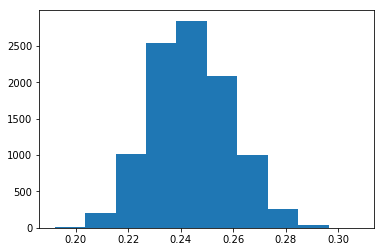

In [10]:
plt.hist(samp_means)
plt.show()

In [12]:
#Obtain the confidence interval using the percentile function
percentile([2.5,97.5],samp_means)

array([0.216, 0.274])

Using asymptotic theory, we would need to utilize the `t` distribution. However, there are some assumptions inherent in this.

In [13]:
xbar=np.mean(iris_sub.column(1))
sd=np.std(iris_sub.column(1))

xbar+np.array([-1,1])*stats.t.ppf(.975,num_obs-1)*sd/sqrt(num_obs)

array([0.21383762, 0.27416238])

Now, suppose you were interested in the confidence interval for the median? Or perhaps the 60th percentile? Using simulation, we can simply adapt the above bootstrap approach. However, there is no easy way using asymptotic theory.